## Video Games Data

Found this dataset for some video game data and I am going to do a pretty standard EDA on this dataset mapping some different interesting things about this dataset it was very fun to work with and I hope you enjoy!

## Credit/ Dataset Resources

Got this datset from Kaggle at this link : https://www.kaggle.com/datasets/maso0dahmed/video-games-data/code?datasetId=4058957&sortBy=dateRun&tab=profile

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud

Defaulting to user installation because normal site-packages is not writeable


In [2]:
df = pd.read_csv("video_games.csv", encoding="latin-1")

In [3]:
rows = df.shape[0]
print(f"Rows: {rows}")
df.head(10)


Rows: 18800


,name,platform,release_date,summary,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,7.9
5,Super Mario Galaxy,Wii,"November 12, 2007",[Metacritic's 2007 Wii Game of the Year] The u...,9.1
6,Super Mario Galaxy 2,Wii,"May 23, 2010","Super Mario Galaxy 2, the sequel to the galaxy...",9.1
7,Red Dead Redemption 2,Xbox One,"October 26, 2018",Developed by the creators of Grand Theft Auto ...,8.0
8,Grand Theft Auto V,Xbox One,"November 18, 2014",Grand Theft Auto 5 melds storytelling and game...,7.9
9,Grand Theft Auto V,PlayStation 3,"September 17, 2013","Los Santos is a vast, sun-soaked metropolis fu...",8.3


## Initial Analysis

after printing the head for this dataframe you can see that there are 5 columns and 17435 rows we are going to be using all the columns except release date. Maybe ill come back and do some computation to involve this data but for now we will just consider this good!

## Platforms

Here is a full list of platforms listed in this dataset. There is also listing for how many times each of these values was used in this column there is no organization done for this computation as it was simply to get an idea of how many systems there were listed in the dataset and get some data to compare with the visualized data segment below.

In [4]:

platform_counts = {}

for platform in df['platform']:
    if platform in platform_counts:
        platform_counts[platform] += 1
    else:
        platform_counts[platform] = 1
print("List of different platforms and the amount of times they are used in the dataset:")
# Display the results
for platform, count in platform_counts.items():
    print(f"{platform}: {count} times")

List of different platforms and the amount of times they are used in the dataset:
 Nintendo 64: 71 times
 PlayStation: 187 times
 PlayStation 3: 1256 times
 Dreamcast: 125 times
 Xbox 360: 1644 times
 Wii: 655 times
 Xbox One: 1179 times
 PC: 4864 times
 Switch: 1399 times
 PlayStation 2: 1414 times
 PlayStation 4: 2056 times
 GameCube: 448 times
 Xbox: 789 times
 Wii U: 184 times
 Game Boy Advance: 438 times
 3DS: 396 times
 Xbox Series X: 77 times
 DS: 720 times
 PlayStation Vita: 257 times
 PlayStation 5: 124 times
 PSP: 512 times
 Stadia: 5 times


## Platforms (Visualization)

Here I plotted a simple pie chart that indicates the top 5 platforms users from this dataset are using. I chose to do top 5 and then all the others as one percentage listed as "Other". there are enough platforms being listed here that some of the data was not properly being displayed and this is why I went this route.

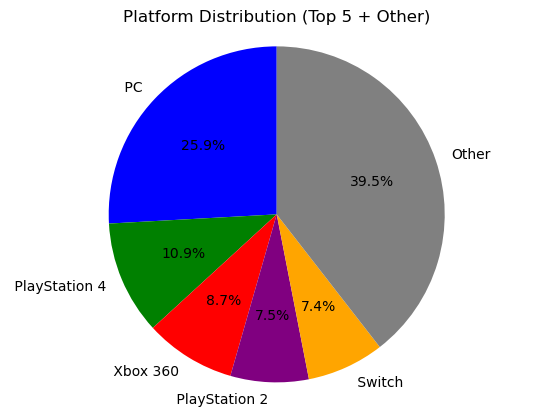

In [5]:
platform_counts = df['platform'].value_counts()
top_platforms = platform_counts.head(5)
top_platforms_df = pd.DataFrame({'platform': top_platforms.index, 'count': top_platforms.values})
other_count = platform_counts.sum() - top_platforms.sum()
other_df = pd.DataFrame({'platform': ['Other'], 'count': [other_count]})
combined_df = pd.concat([top_platforms_df, other_df])

fig, ax = plt.subplots()
ax.pie(combined_df['count'], labels=combined_df['platform'], autopct='%1.1f%%', startangle=90, colors=['blue', 'green', 'red', 'purple', 'orange', 'gray'])
ax.axis('equal')
plt.title('Platform Distribution (Top 5 + Other)')
plt.show()

## User review Column

So in this data i noticed that there is a user review column with values ranging from 0-10 and also having a tbd value that is not described and is likely skewing the results of any computation done on that column. So I left it out of the computation. In this first cell below you will see a list of the top 5 games according to user reviews and their index in the dataset along with the score they got in the user review. In the bottom cell below you will see the least favorite 5 games based on the user reviews.

In [6]:
df = df[df['user_review'] != 'tbd']
df['user_review'] = pd.to_numeric(df['user_review'], errors='coerce')
df = df.dropna(subset=['user_review'])

sorted_df = df.sort_values(by='user_review', ascending=False)
top_5_games = sorted_df.head(5)
print("Top 5 games based on user reviews:")
print(top_5_games[['name', 'user_review']])

Top 5 games based on user reviews:
                                              name  user_review
3504   Z.H.P. Unlosing Ranger vs Darkdeath Evilman          9.7
2450                Ghost Trick: Phantom Detective          9.7
4953                                       Rochard          9.7
14836                                Metal Torrent          9.7
9550                           After Burner Climax          9.7


In [7]:
df = df[df['user_review'] != 'tbd']
df['user_review'] = pd.to_numeric(df['user_review'], errors='coerce')
df = df.dropna(subset=['user_review'])

sorted_df = df.sort_values(by='user_review', ascending=False)
bottom_5_games = sorted_df.tail(5)

print("Least favorite games based on user reviews:")
print(bottom_5_games[['name', 'user_review']])

Least favorite games based on user reviews:
                         name  user_review
10858           Madden NFL 22          0.6
15693  Warcraft III: Reforged          0.6
12336           Madden NFL 22          0.5
11261           Madden NFL 21          0.5
14510           Madden NFL 21          0.2


## WordCloud 

In order to have a little fun during this EDA i also did a wordcloud based on the data housed in the Summary column. 

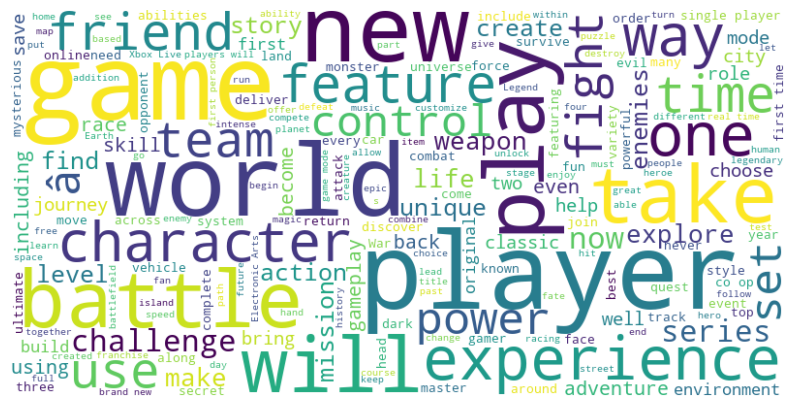

In [8]:
text = ' '.join(df['summary'].astype(str))

wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Closing thoughts.

I have found this dataset to be super fun and provided some easy to use data to play and learn with. 
Doing this EDA reminded me of all the fun games I used to play as a child and all the fun systems that have been released in my life and makes me greatful to be apart of this technilogical time period. 

    I hope you enjoyed and please feel free to check out any other projects I have listed here on my github. There are loads of fun projects and programs including a wicked fast Roku remote operated thru any CLI environment. A Python4everything repo that houses any python script that has worked to accomplish a specific task for me and a description of how i used it. 